### Convolutional Neural Networks with CIFAR-10 Dataset

This notebooks demonstrates the use of convolutional neural networks for image classification with CIFAR-10 dataset.

**CIFAR-10**:The CIFAR-10 dataset is a widely used benchmark dataset in the field of computer vision and machine learning. It stands for "Canadian Institute for Advanced Research 10" and was created by researchers at the University of Toronto.

The dataset consists of 60,000 color images, each with a resolution of 32x32 pixels. These images are divided into 10 classes, with each class representing a different object category. The classes include common objects such as airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships, and trucks. Each class contains 6,000 images.

In [ ]:
# Import TensorFlow
import tensorflow as tf

# Other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Normalize images
X_train, X_test = X_train / 255.0, X_test / 255.0
# Flatten y_train to attain proper format
y_train, y_test = y_train.flatten(), y_test.flatten()
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)

170498071/170498071 [==============================] - 13s 0us/step
X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [ ]:
# Number of classes
K = len(set(y_train))
print("Number of Classes:", K)

Number of Classes: 10


In [ ]:
shape = X_train[0].shape
shape

(32, 32, 3)

In [ ]:
# Build the CNN
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and Fit ! Make sure that you're using GPU
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 20s 6ms/step - loss: 1.5842 - accuracy: 0.4208 - val_loss: 1.3247 - val_accuracy: 0.5128
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3069 - accuracy: 0.5303 - val_loss: 1.1620 - val_accuracy: 0.5811
Epoch 3/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1687 - accuracy: 0.5806 - val_loss: 1.0590 - val_accuracy: 0.6233
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0660 - accuracy: 0.6191 - val_loss: 0.9997 - val_accuracy: 0.6403
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9847 - accuracy: 0.6480 - val_loss: 0.9222 - val_accuracy: 0.6784
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9228 - accuracy: 0.6749 - val_loss: 0.8863 - val_accuracy: 0.6898
Epoch 7/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8747 - accuracy: 0.6898 - val_loss: 0.8842 - val_accur

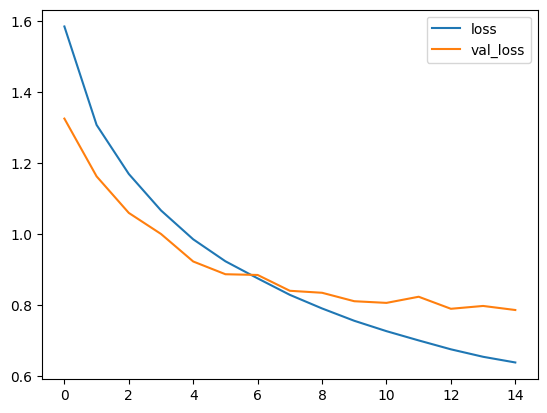

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

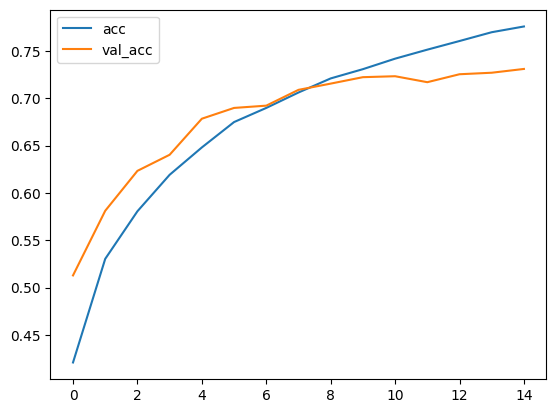

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without Normalization")

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.xticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

313/313 [==============================] - 1s 3ms/step
Confusion Matrix, without Normalization
[[788  27  50  10  12   1  10  11  54  37]
 [ 16 859   2   3   5   3   9   2  23  78]
 [ 66  11 605  48 105  42  68  29  17   9]
 [ 20   7  78 479  76 157  96  47  21  19]
 [ 25   5  64  42 737  20  43  49   8   7]
 [ 20   4  49 164  72 573  34  70   6   8]
 [  4   6  28  30  43  14 852   6   9   8]
 [ 17   2  27  29  69  39   7 794   4  12]
 [ 70  43  10  10   6   5   6   4 826  20]
 [ 33  93  13   9  13   6   4   8  24 797]]


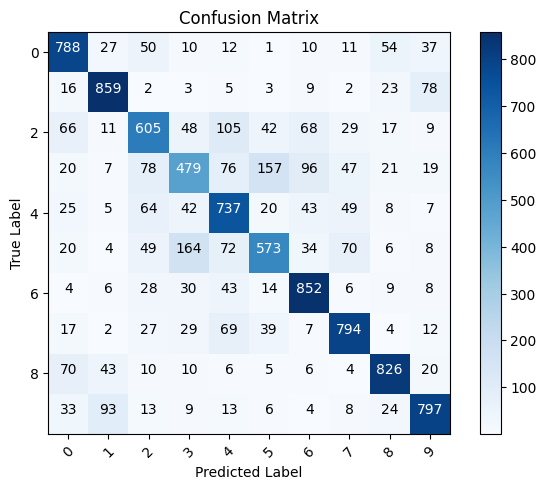

In [ ]:
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# Label mapping
labels = """airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck
""".split()
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

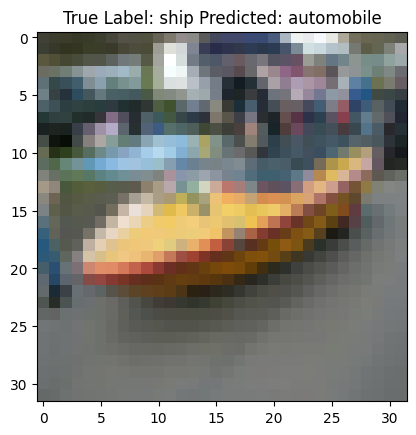

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True Label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));